# Determinants of Irrecoverable Prosper Loans
## by Nyiko Ndlebe

## Investigation Overview

The study aims to highlight some of the key factors that may determine the likelihood of a borrower defaulting on their loan. The key variables we will focus will be the BorrowerAPR as well as Prosper Score, which is a risk rating applied to issued loans. We will also look at the income levels of borrowers, the loan amounts, loan periods as well as the number of investors contributing to a loan

- I found that the biggest predictor of an irrecoverable loan appears to be a higher interest rate (BorrowerAPR). 
- The interest rate is influenced by the borrower's ProsperScore, which is influenced by their income level, loan amount and employment among other factors not explored here
- We also see that 36 month terms have higher rates, which coincides with the lowest ProsperScores. 
- This supports the earlier finding of lower ProsperScores and higher interest rates leading to more irrecoverable loans but also gives us more additional information on which term may be the most problematic.

## Dataset Overview

This study explores a dataset containing a list of loans from credit provider, Prosper. The original dataset consists of a total of 113,937 rows containing the details of loans issued from 2005 to 2014, with 81 different variables.

After some preliminary cleaning and removing data that I considered to be irrelevant to the study, the dataset was reduced to 26,210 loans with the following 12 variables:
- Term
- LoanStatus
- BorrowerAPR
- ProsperScore
- ListingCategory
- EmploymentStatus
- IsBorrowerHomeowner
- IncomeRange
- StatedMonthlyIncome
- LoanOriginalAmount
- MonthlyLoanPayment
- Investors

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_status = pd.read_csv('cleanedloan_data.csv')

In [3]:
# Change datatype to category
loan_status['LoanStatus'] = loan_status['LoanStatus'].astype('category').copy()
loan_status['ListingCategory'] = loan_status['ListingCategory'].astype('category').copy()
loan_status['EmploymentStatus'] = loan_status['EmploymentStatus'].astype('category').copy()

In [4]:
# Change datatype to str
loan_status['Term'] = loan_status['Term'].astype('str')
# Set new order for 'Term'
term_order = ['12', '36', '60']
# Create ordered category
terms = pd.api.types.CategoricalDtype(ordered = True, categories = term_order)
# Change datatype to ordered categorical
loan_status['Term'] = loan_status['Term'].astype(terms).copy()

# https://stackoverflow.com/questions/71101788/how-to-change-the-category-code-in-a-category-column-in-pandas

In [5]:
# Set new order for 'IncomeRange'
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
# Create ordered category
income = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
# Change datatype to ordered categorical
loan_status['IncomeRange'] = loan_status['IncomeRange'].astype(income).copy()

In [6]:
# Change ProsperScore to int
loan_status['ProsperScore'] = loan_status['ProsperScore'].astype('int64').copy()

## **Loan Status Distribution**

In this reduced breakdown of Loan Status, that does not take current or overdue payments into account, we find that 76% of loans have been **completed** with the rest considered to be **irrecoverable**


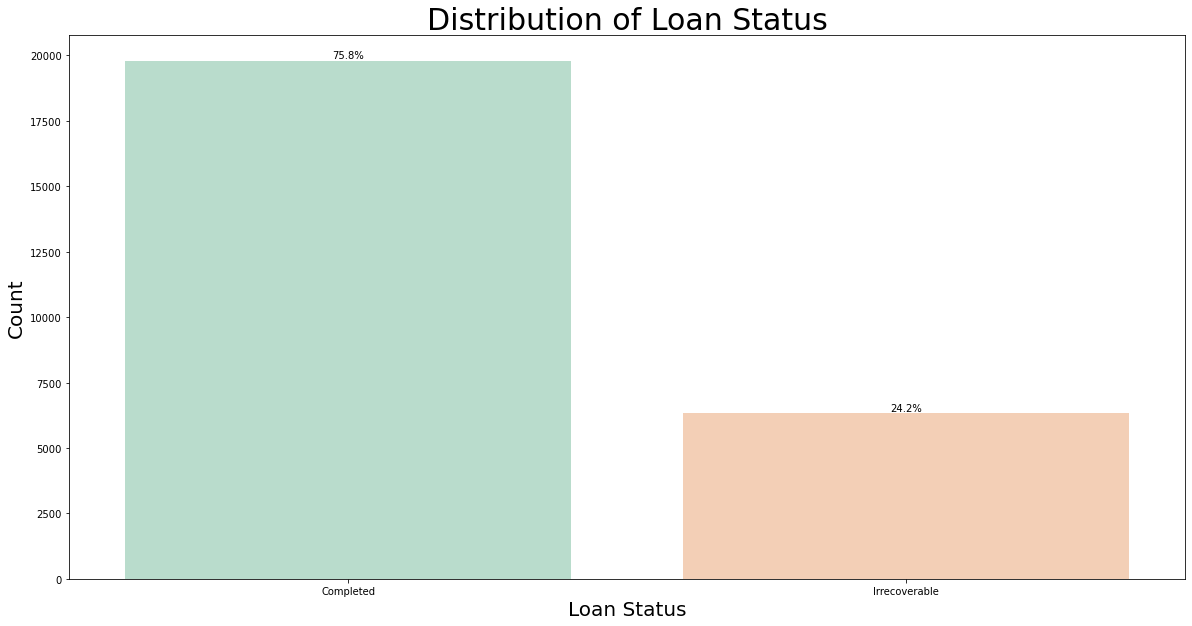

In [7]:
plt.figure(figsize = [20, 10])
ax = sb.countplot(data = loan_status, x = 'LoanStatus', palette = 'Pastel2')
plt.xlabel('Loan Status',fontsize = 20)
plt.ylabel('Count', fontsize = 20);
plt.title('Distribution of Loan Status', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Create function to show percentages
def percent_func():
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    return ax.annotate(percentage, (x, y), ha = 'center', va = 'center')
    
# Show percentages
total = len(loan_status)
for p in ax.patches:
    percent_func()

## **Relationship between Loan Status and Borrower APR**

- Irrecoverable loans are more associated with a higher interest rate, on average, than completed loans
- The median rate for irrecoverable loans is 0.30 and 0.25 for completed loans

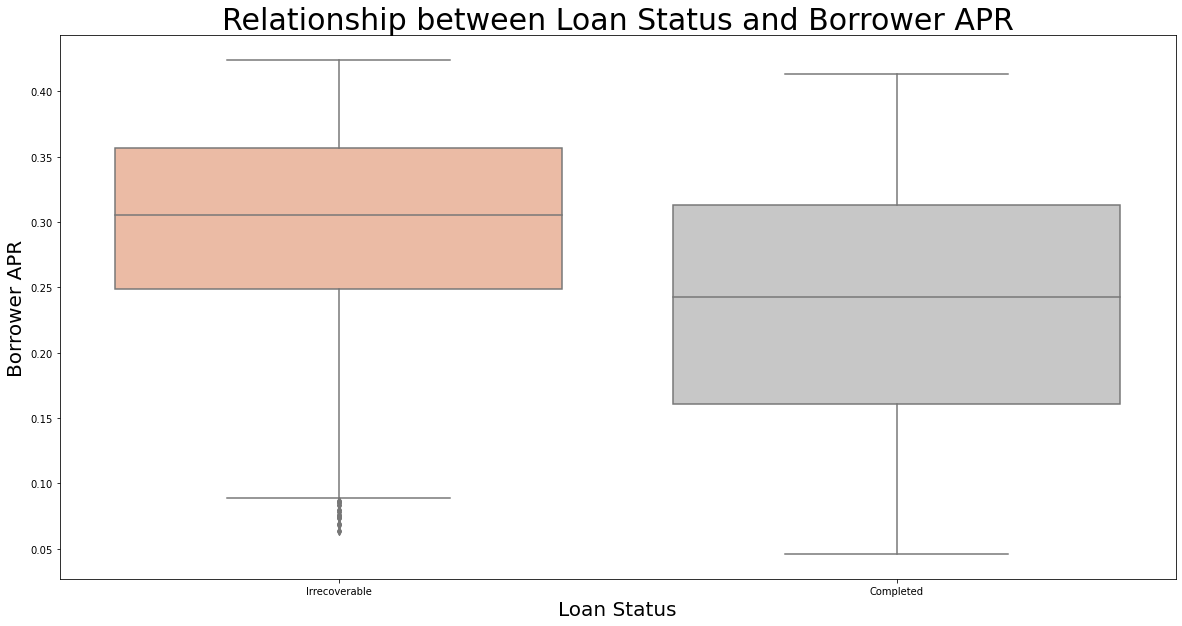

In [8]:
# Set order for chart
order = loan_status.groupby(by=['LoanStatus'])['BorrowerAPR'].median().sort_values().iloc[::-1].index
# Plot chart
plt.figure(figsize = [20, 10])
sb.boxplot(data=  loan_status, y = 'BorrowerAPR', x =  'LoanStatus', palette = 'RdGy', order = order)
plt.xlabel('Loan Status', fontsize = 20)
plt.ylabel('Borrower APR', fontsize = 20)
plt.title('Relationship between Loan Status and Borrower APR', fontsize = 30);

## **Distribution of Prosper Scores for Irrecoverable loans**
- Prosper Scores between 1 and 6 make up 67.7% of irrecoverable loans 
- Prosper scores between 7 and 10 make up 32.3% of irrecoverable loans

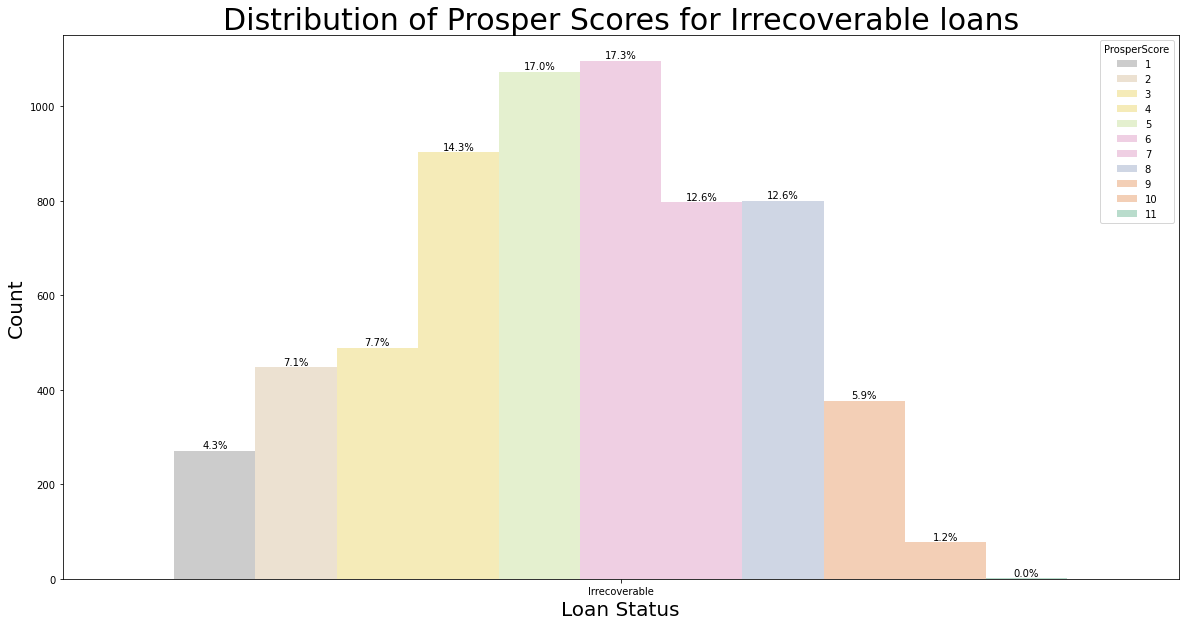

In [9]:
# Plot count plot
df = loan_status.query('LoanStatus == "Irrecoverable"')
df['LoanStatus'] = df['LoanStatus'].astype('str').copy()
plt.figure(figsize = [20, 10])
ax = sb.countplot(data = df, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Pastel2_r')
plt.xlabel('Irrecoverable',fontsize = 20)
plt.ylabel('Count', fontsize = 20);
plt.title('Distribution of Prosper Scores for Irrecoverable loans', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Show percentages
total = len(df)
for p in ax.patches:
    percent_func()

## **Relationship between BorrowerAPR & Prosper Score on the likelihood of an irrecoverable loan**

- For any given Prosper Score, irrecoverable loans generally have a higher interest rate than completed loans
- BorrowerAPR declines as Prosper Scores increase
- There is only one irrecoverable loan with a ProsperScore of 11

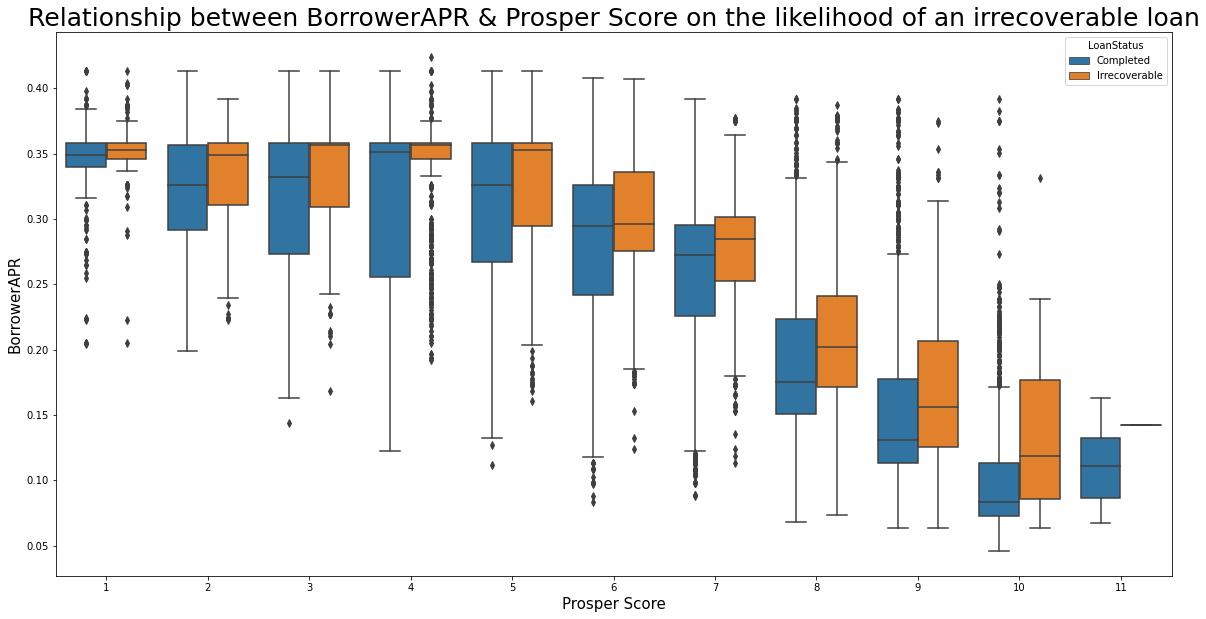

In [10]:
# Plot graph
plt.figure(figsize = [20, 10])
sb.boxplot(data = loan_status, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'LoanStatus')
plt.xlabel('Prosper Score', fontsize = 15)
plt.ylabel('BorrowerAPR', fontsize = 15)
plt.title('Relationship between BorrowerAPR & Prosper Score on the likelihood of an irrecoverable loan', fontsize = 25);

## **Relationship between term and BorrowerAPR & Prosper Score vs Loan Term on the likelihood of a loan being irrecoverable**
**BorrowerAPR**
- Irrecoverable loans with a 36 month term have the highest median BorrowerAPR, followed by 12 months and then 60 months.
- For Completed loans, the lowest median BorrowerAPR is for a 12 month term. The 36 month term also has the highest BorrowerAPR.

**ProsperScore**
- The median ProsperScore for completed loans is the same for 12 and 36 month terms. The 60 month term has the lowest median ProsperScore.
- The median ProsperScore for irrecoverable loans is the same for 12 and 60 month terms. The 36 month term has the lowest median ProsperScore.

**Summary**
- We see that 36 month terms have the higher rates, which coincides with the lowest ProsperScores
- This supports the earlier finding of lower ProsperScores and higher interest rates leading to more irrecoverable loans but also gives us more additional information on which term may be the most problematic.

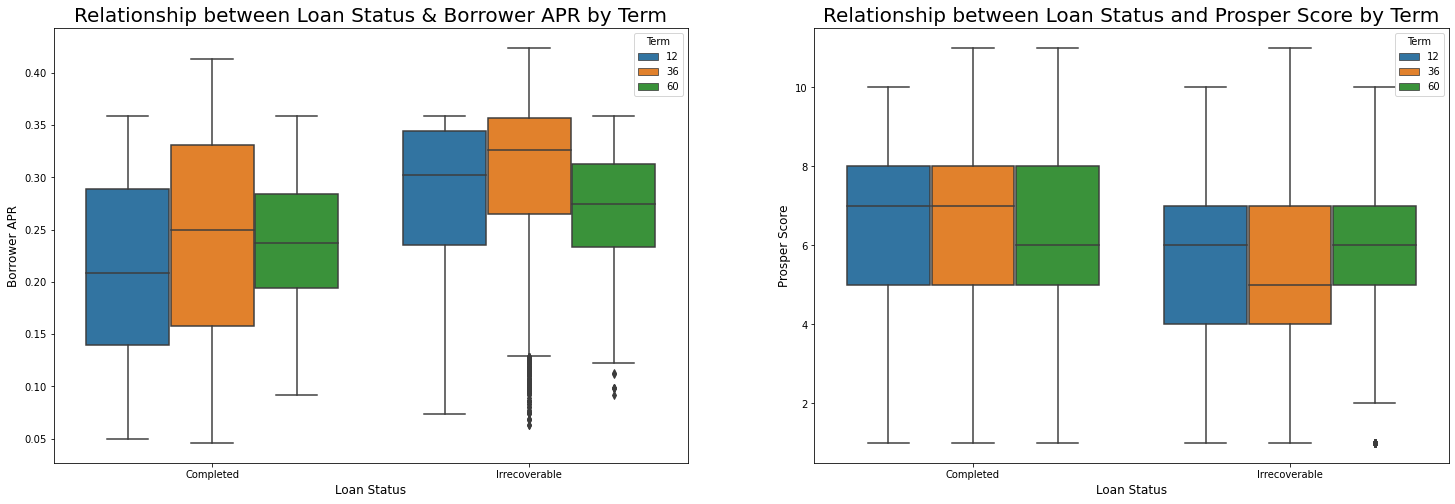

In [11]:
# Subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 8))
# Plot Loan Status vs Borrower APR by Term
sb.boxplot(data = loan_status, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term', ax = ax1)
ax1.set_xlabel('Loan Status', fontsize = 12)
ax1.set_ylabel('Borrower APR', fontsize = 12)
ax1.set_title('Relationship between Loan Status & Borrower APR by Term', fontsize = 20)
# Plot Loan Status vs ProsperScore by Term
sb.boxplot(data = loan_status, x = 'LoanStatus', y = 'ProsperScore', hue = 'Term', ax = ax2)
ax2.set_xlabel('Loan Status', fontsize = 12)
ax2.set_ylabel('Prosper Score', fontsize = 12)
ax2.set_title('Relationship between Loan Status and Prosper Score by Term', fontsize = 20)
ax2.legend(loc = 'upper right', title = 'Term');

## **Relationship between Borrower APR and Investors by Prosper Score and Loan Status**
 - The lowest Prosper Scores have the fewest amount of investors and the highest interest rates
 - Irrecoverable loans for Prosper Scores between 5 and 8 an almost even distribution across all the interest rates
 - There are very few irrecoverable loans for Prosper Scores above 8

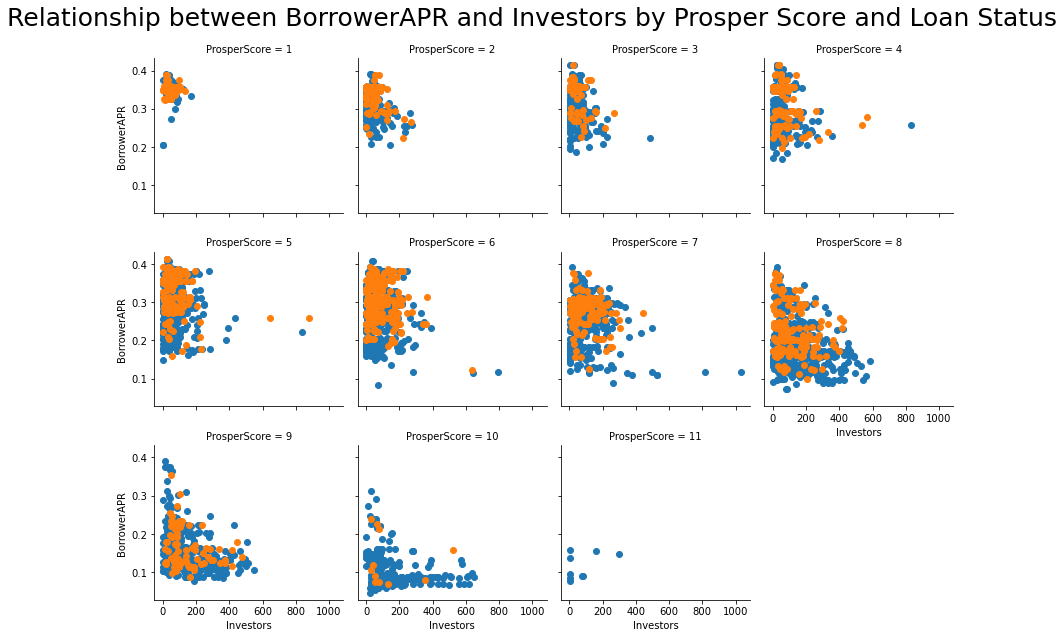

In [12]:
# Plot correlations
g = sb.FacetGrid(data = loan_status.sample(5000), col = 'ProsperScore', hue = 'LoanStatus', col_wrap = 4, height = 3)
g.map(plt.scatter, 'Investors', 'BorrowerAPR', alpha = 1);
# Add title
g.fig.suptitle('Relationship between BorrowerAPR and Investors by Prosper Score and Loan Status', size = 25)
g.fig.subplots_adjust(top = .9);
#### Stated Monthly Income & Loan Original Amount vs Prosper Score by Loan Status

## **Stated Monthly Income & Loan Original Amount vs Prosper Score by Loan Status**

- **StatedMonthlyIncome vs ProsperScore**
    - Irrecoverable loans for each Prosper Score are associated with lower incomes than their completed counterparts
    - Incomes decrease from Prosper Score 1 and reach their lowest levels at Prosper Score 4 and then steadily increase for each level
    <br> <br>
- **LoanOriginalAmount vs ProsperScore**
    - There is very little difference between loan amounts for irrecoverable and completed loans for each Prosper Score from 1 to 8
    - For scores of 9 and 10, irrecoverable loans had higher loan amounts than completed loans

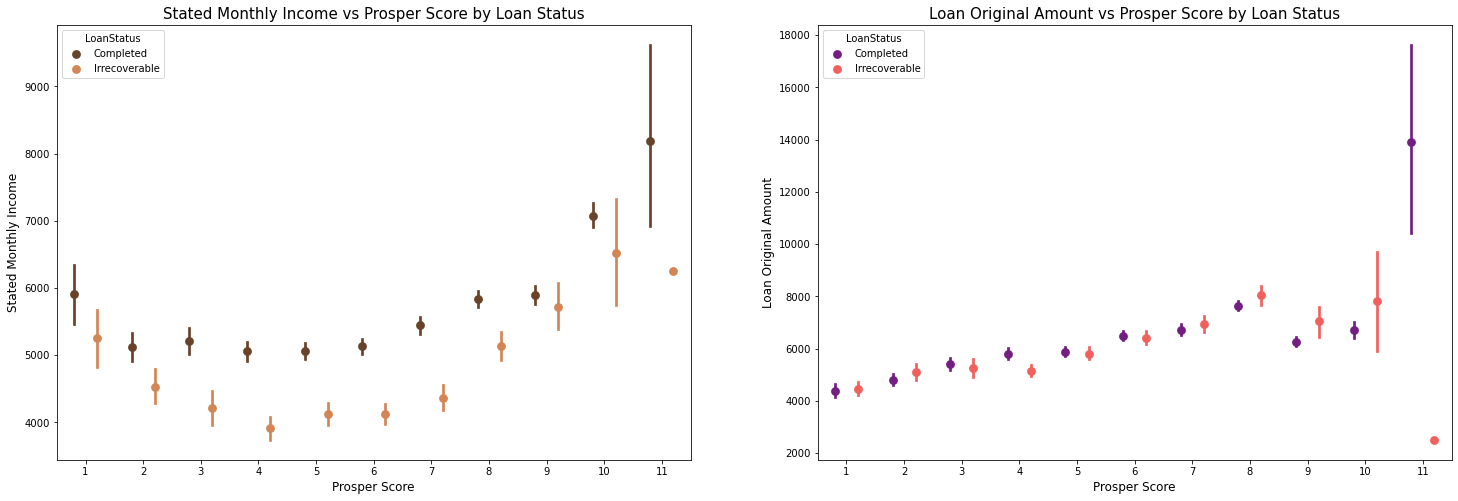

In [17]:
# Subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 8))
# Plot Loan StatedMonthlyIncome vs ProsperScore by LoanStatus
sb.pointplot(data = loan_status, x = 'ProsperScore', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'copper', linestyles = '', dodge = 0.4, ax = ax1)
ax1.set_xlabel('Prosper Score', fontsize = 12)
ax1.set_ylabel('Stated Monthly Income', fontsize = 12)
ax1.set_title('Stated Monthly Income vs Prosper Score by Loan Status', fontsize = 15)
# Plot Loan LoanOriginalAmount vs ProsperScore by LoanStatus
sb.pointplot(data = loan_status, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'magma', linestyles = '', dodge = 0.4, ax = ax2)
ax2.set_xlabel('Prosper Score', fontsize = 12)
ax2.set_ylabel('Loan Original Amount', fontsize = 12)
ax2.set_title('Loan Original Amount vs Prosper Score by Loan Status', fontsize = 15);

# Thank you

In [23]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 939141 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\NyikoN\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\NyikoN\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\NyikoN\Anaconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\NyikoN\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\NyikoN\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\NyikoN\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 426, in start